# Implementing Neural Networks in PyTorch

This notebook provides you with a set of code examples to implement neural networks with PyTorch.

## Creating a Sample Image

In [1]:
import torch 

H = 12
W = 16
S = 4
image = torch.zeros(1, H, W) 
for idx in range(0, H, S):
    for idy in range(0, W, S):
        image[0, idx:idx + S, idy:idy + S] = (-1) ** (idx // S + idy // S)


In [2]:
import matplotlib.pyplot as plt

def plot_image(image):
    """Render an image."""
    plt.imshow(image, cmap="gray", aspect="equal", vmin=-2, vmax=2, 
               extent=[0, image.shape[1], 0, image.shape[0]])
    plt.colorbar()
    plt.xticks(range(0, image.shape[1] + 1))
    plt.yticks(range(0, image.shape[0] + 1))
    plt.grid(color="red", linewidth=1)
    plt.tight_layout()
    plt.show()

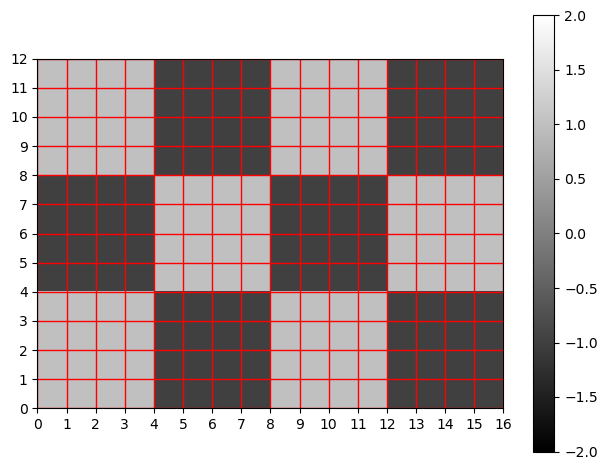

In [3]:
plot_image(image.squeeze())

## Implementing Convolutional Layers

In [4]:
import torch.nn as nn

conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=(1, 3), bias=False)
filters = torch.zeros(conv.out_channels, conv.in_channels, *conv.kernel_size)
filters[0, 0, :, :] = torch.Tensor([[1, 1, 1],]) / 3
filters[1, 0, :, :] = torch.Tensor([[-1, 0, 1],])
conv.weight = nn.Parameter(filters)

features_conv = conv(image.unsqueeze(0))

In [5]:
def plot_channels(channels):
    """Render multiple channels."""
    fig, axs = plt.subplots(1, channels.shape[0], figsize=(15, 5))
    for channel, ax, i in zip(channels, axs, range(channels.shape[0])):
        im = ax.imshow(channel, cmap="gray", aspect="equal", vmin=-2, vmax=2,
            extent=[0, channel.shape[1], 0, channel.shape[0]])
        plt.colorbar(im)
        ax.set_title(f"Channel {i}")
        ax.set_xticks(range(0, channel.shape[1] + 1))
        ax.set_yticks(range(0, channel.shape[0] + 1))
        ax.grid(color="red", linewidth=1)
    plt.tight_layout()
    plt.show()

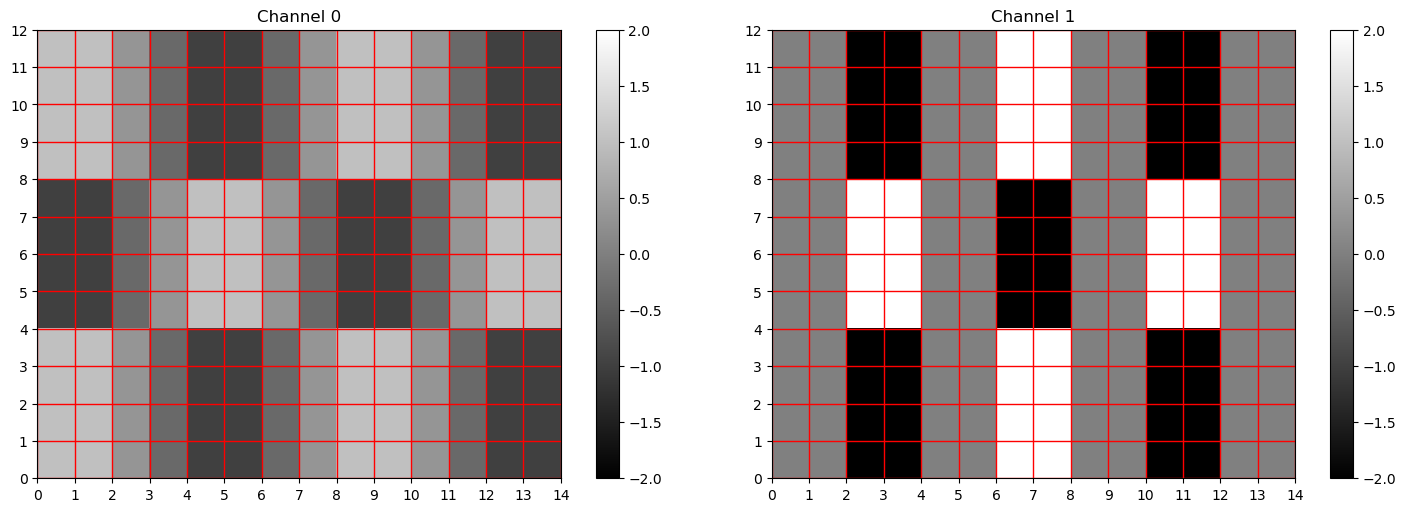

In [6]:
plot_channels(features_conv[0].detach())

## Implementing ReLU Activation

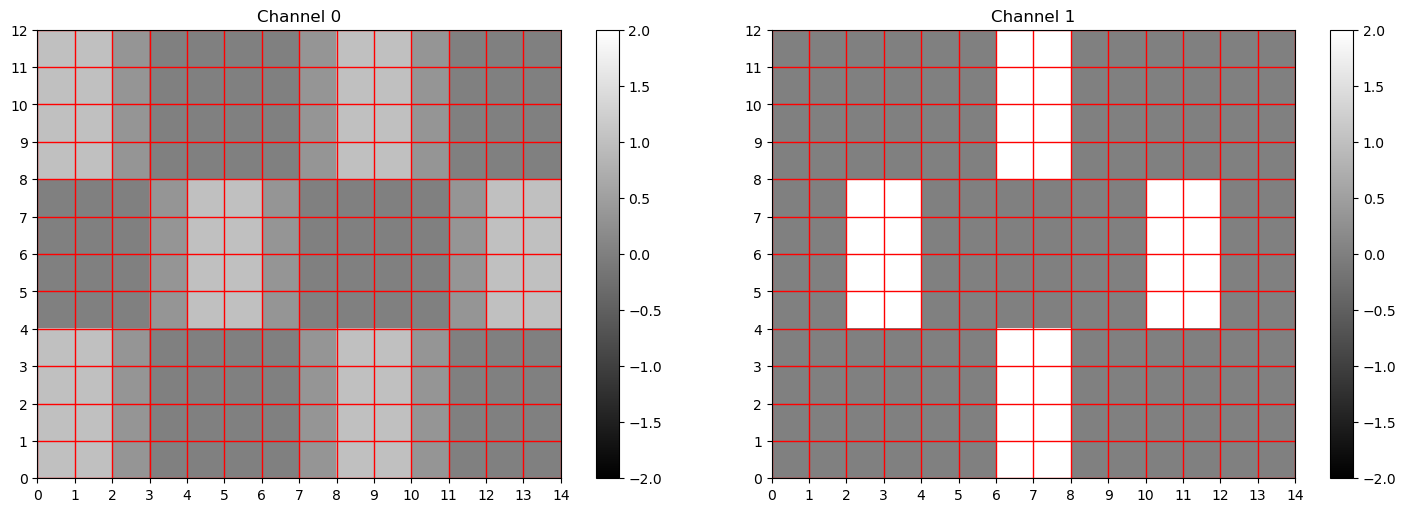

In [7]:
relu = nn.ReLU()
model_relu = nn.Sequential(conv, relu)

features_relu = model_relu(image.unsqueeze(0))

plot_channels(features_relu[0].detach())


## Implementing Pooling Layers

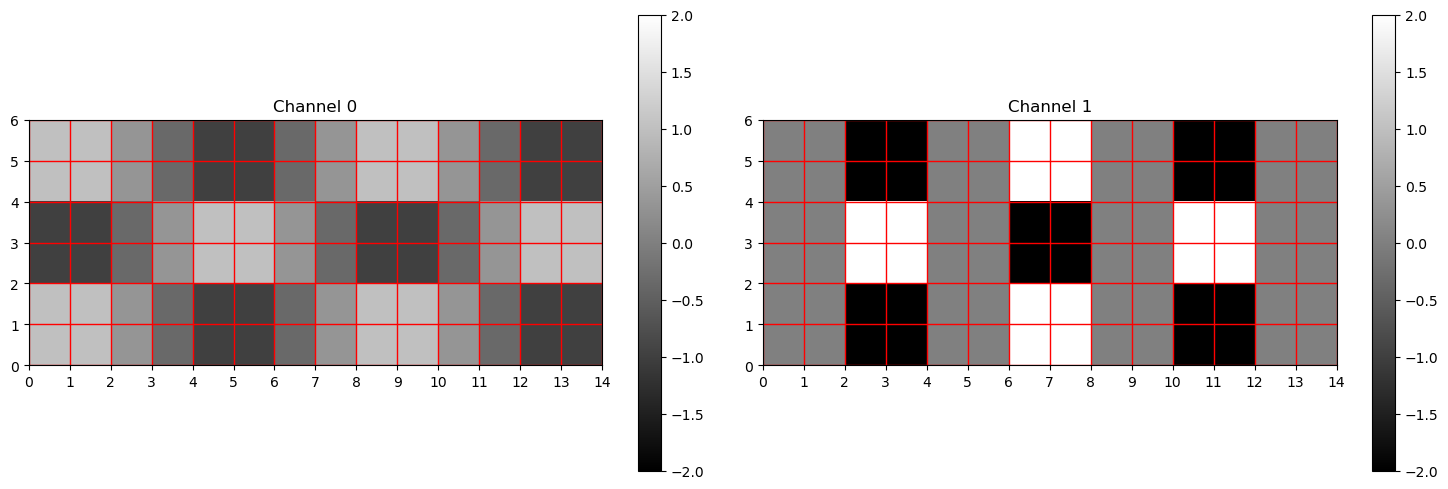

In [8]:
pool = nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1)) 
model_pool = nn.Sequential(conv, pool)

features_pool = model_pool(image.unsqueeze(0))

plot_channels(features_pool[0].detach())

## Implementing Upsampling Layers


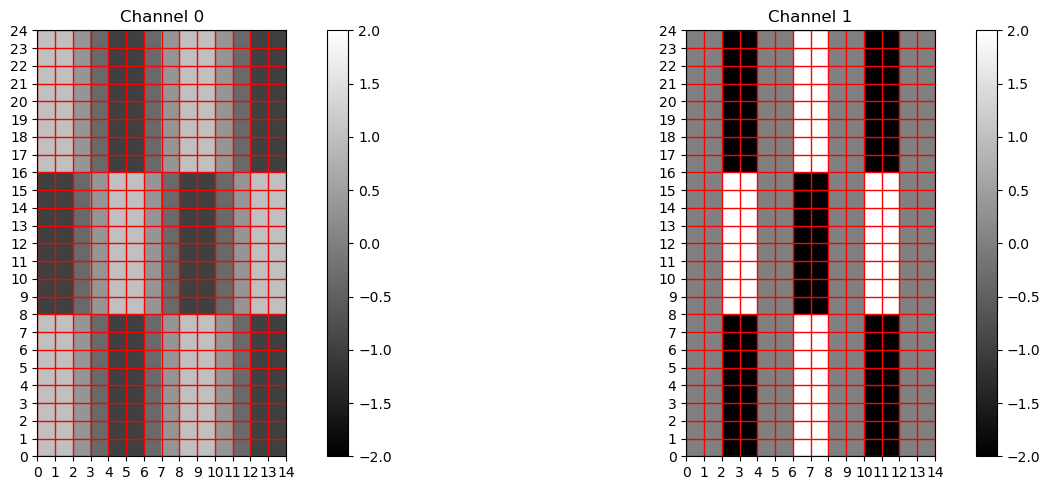

In [9]:
upsample = nn.Upsample(scale_factor=(2, 1)) 
model_upsample = nn.Sequential(conv, upsample)

features_upsample = model_upsample(image.unsqueeze(0))

plot_channels(features_upsample[0].detach())

## Transforming Images

In [11]:
model_trans = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3), 
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3), 
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
)

image_trans = model_trans(image.unsqueeze(0))[0]

print(f"Input image with {image.shape}")
print(f"Output image with {image_trans.shape}")

Input image with torch.Size([1, 12, 16])
Output image with torch.Size([32, 1, 2])


## 

In [12]:
model_clas = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3), 
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3), 
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(in_features=32 * 1 * 2, out_features=2),
    nn.Softmax(dim=1),
)

classification = model_clas(image.unsqueeze(0))[0]

print(f"Input image with {image.shape}")
print(f"Output image with {classification.shape}")

Input image with torch.Size([1, 12, 16])
Output image with torch.Size([2])
